In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xAPI-Edu-Data/xAPI-Edu-Data.csv


In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('whitegrid')

from sklearn.impute import SimpleImputer as Imputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/kaggle/input/xAPI-Edu-Data/xAPI-Edu-Data.csv") #at first we import the dataset

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
print (df.shape)

(480, 17)


In [6]:
df.isnull().sum() #so we can consider that we don't have null values, so we can go fast through dataset

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [8]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [9]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [10]:
df.rename(index=str, columns={'gender':'Gender', 
                              'NationalITy':'Nationality',
                              'raisedhands':'RaisedHands',
                              'VisITedResources':'VisitedResources'},
                               inplace=True)
df.columns #here we want to make the dataset neat as some words had capital and small alphabets together

Index(['Gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [11]:
df.dtypes

Gender                      object
Nationality                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
RaisedHands                  int64
VisitedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [12]:
for i in range(1,17):
    print(df.iloc[:,i].value_counts())
    print("*"*20)

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
Lybia            6
USA              6
Morocco          4
venzuela         1
Name: Nationality, dtype: int64
********************
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Tunis            9
Egypt            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
********************
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
********************
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
********************
A    283
B    167
C     30
Name: SectionID, dtype: int64
********************
IT   

In [13]:
print("Class Unique Values : ", df["Class"].unique())
print("Topic Unique Values : ", df["Topic"].unique())
print("StudentAbsenceDays Unique Values : ", df["StudentAbsenceDays"].unique())
print("ParentschoolSatisfaction Unique Values : ", df["ParentschoolSatisfaction"].unique())
print("Relation Unique Values : ", df["Relation"].unique())
print("SectionID Unique Values : ", df["SectionID"].unique())
print("Gender Unique Values : ", df["Gender"].unique())

Class Unique Values :  ['M' 'L' 'H']
Topic Unique Values :  ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
StudentAbsenceDays Unique Values :  ['Under-7' 'Above-7']
ParentschoolSatisfaction Unique Values :  ['Good' 'Bad']
Relation Unique Values :  ['Father' 'Mum']
SectionID Unique Values :  ['A' 'B' 'C']
Gender Unique Values :  ['M' 'F']


In [14]:
df.groupby('Class').size()

Class
H    142
L    127
M    211
dtype: int64

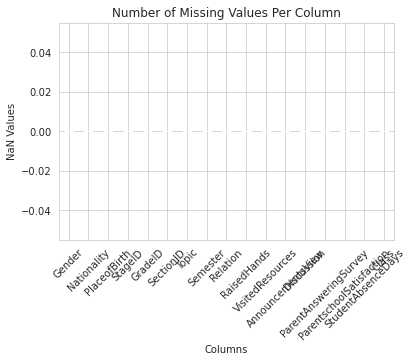

In [15]:
# plot missing data:
df.isnull().sum().plot(kind='bar')
# Add a title and show the plot.
plt.title('Number of Missing Values Per Column')
# Create tick mark labels on the Y axis and rotate them.
plt.xticks(rotation = 45)
# Create X axis label.
plt.xlabel("Columns")
# Create Y axis label.
plt.ylabel("NaN Values");

In [16]:
# drop any duplicate value if exists
df.drop_duplicates()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [17]:
df.shape
# so no duplicate value, no missing


(480, 17)

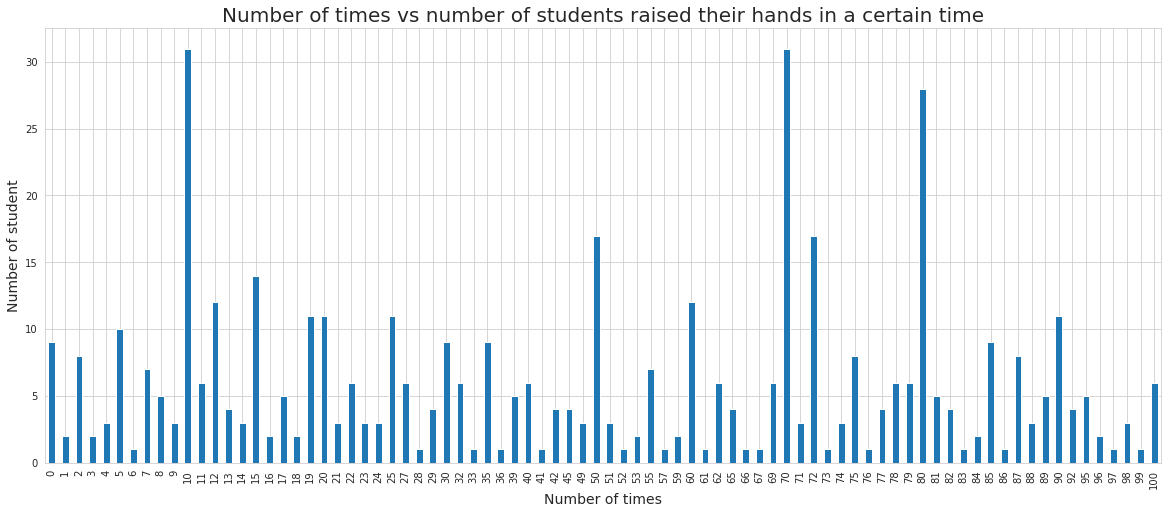

In [18]:
#we want to visualize how many times students raised their hand in a time=x
plt.subplots(figsize=(20, 8))
df["RaisedHands"].value_counts().sort_index().plot.bar()
plt.title("Number of times vs number of students raised their hands in a certain time", fontsize=20)
plt.xlabel("Number of times", fontsize=14)
plt.ylabel("Number of student", fontsize=14)
plt.show()

In [19]:
df.columns

Index(['Gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

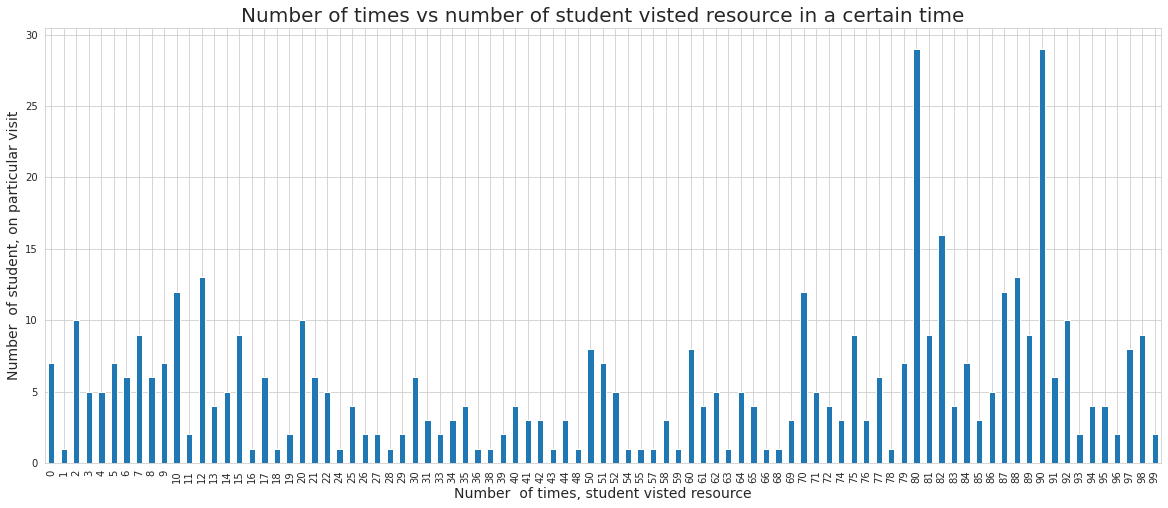

In [20]:
#we want to visualize how many times students visited certin resources in a particular time
plt.subplots(figsize=(20, 8))
plt.title("Number of times vs number of student visted resource in a certain time", fontsize=20)
df["VisitedResources"].value_counts().sort_index().plot.bar()
plt.xlabel("Number  of times, student visted resource", fontsize=14)
plt.ylabel("Number  of student, on particular visit", fontsize=14)
plt.show()

In [21]:
# we want to analysis the relation between gender and performance
df_edu=df.groupby(['Gender','Class']).size()

df_edu

Gender  Class
F       H         75
        L         24
        M         76
M       H         67
        L        103
        M        135
dtype: int64

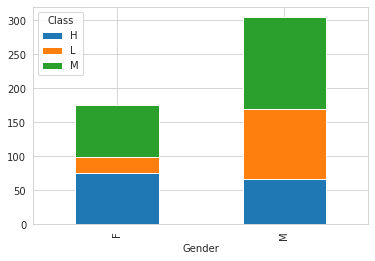

In [22]:
df_edu.unstack().plot(kind='bar', stacked=True)

In [23]:
#From this bar chart we visualize that male students are more on "medium" and "lower" category while girls show better performance

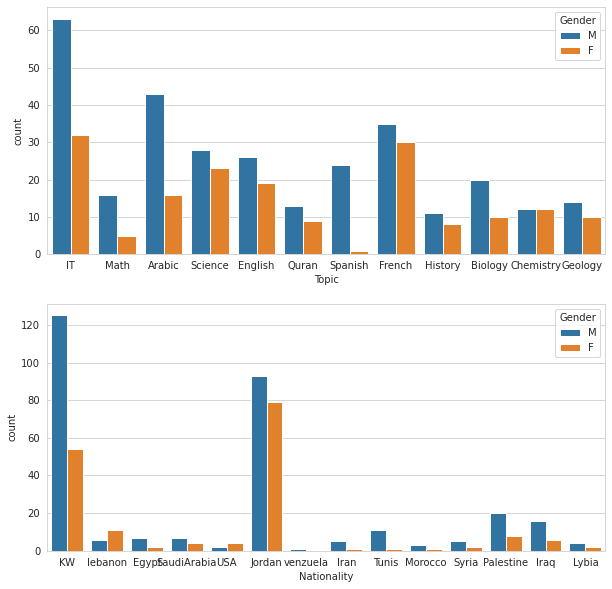

In [24]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='Gender', data=df, ax=axis1)
sns.countplot(x='Nationality', hue='Gender', data=df, ax=axis2)

In [25]:
# We see the gender wise performance at country level and by each subject

# According to those charts Although it shows girls have better performance but when we analyzie the topic diagram, we see that, girls took less technical subjects

# As we see in the Nationality diagram, there is Gender disparity at a country level so maybe its another reason that girls  participated less than boys




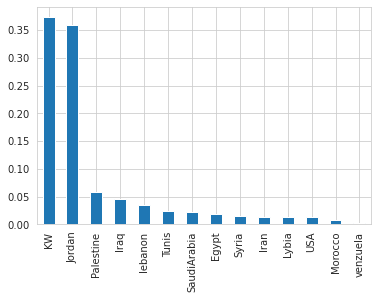

In [26]:
# illustrate the percentage of participants from each country
df.Nationality.value_counts(normalize= True).plot(kind='bar')

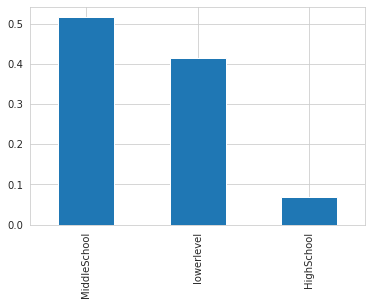

In [27]:
# illustrate the percentage of participants according to their education level
df.StageID.value_counts(normalize=True).plot(kind='bar')

# visualizing categorical features with numerical features


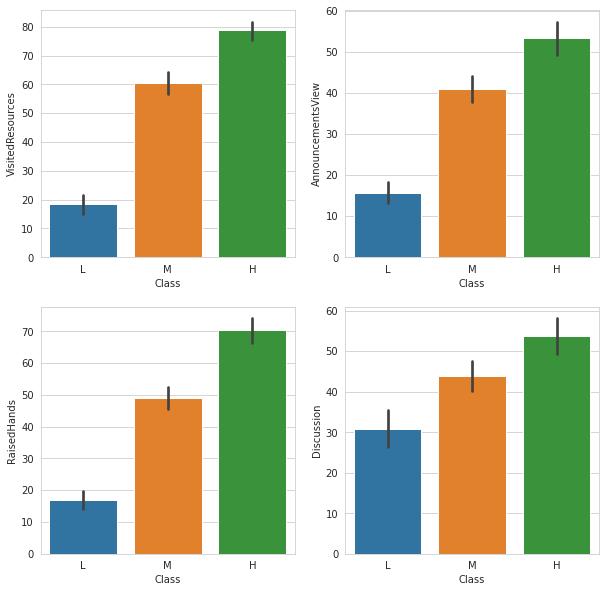

In [28]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisitedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='RaisedHands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

In [29]:
#As expected, those that participated more (higher counts in Discussion, raisedhands, AnnouncementViews, RaisedHands), performed better.
#that thing about correlation and causation


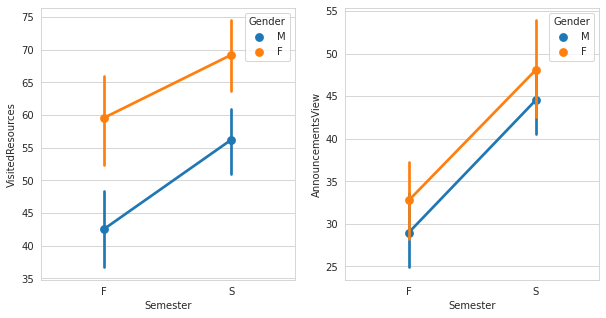

In [30]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisitedResources', hue='Gender', data=df, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='Gender', data=df, ax=axis2)

In [31]:
#As we see both visiting resources and viewing announcements, students were more vigilant in the second semester, perhaps that last minute need to boost your final grade.

Our Goal is to predit the Class label which is the level of the student as predicted by the model. The level of student is divided into three categories by their score/grade in the semester as following : 
* Low-Level: interval includes values from 0 to 69,
* Middle-Level: interval includes values from 70 to 89,
* High-Level: interval includes values from 90-100.

We conclude it is a supervised classification task where we need to predict the categorical label. 
So we use the following three algorithms to test on the dataset and make 3 models.
1. Decision Trees
2. Naive Bayes
3. Randomn Forest Classifier

Finally , we will conclude with the model which has the most accuracy on the test test. 



# Decision Tree Learning on Data


In [32]:
#Create a new dataframe for processing data in decision tree.
df_dt=df.copy()

In [33]:
df_dt.head(10)

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [34]:
replace_map = {'Gender': {'F': 1, 'M': 2}}
replace_map1 = {'Nationality': {'Egypt': 1, 'Iran': 2, 'Iraq': 3, 'Jordan': 4, 'KW':5,'Lybia': 6, 'Morocco': 7, 'Palestine': 8 , 'SaudiArabia': 9 , 'Syria': 10,'Tunis': 11,'USA': 12,'lebanon': 13,'venzuela': 14}}
replace_map2 = {'PlaceofBirth': {'Egypt': 1, 'Iran': 2, 'Iraq': 3, 'Jordan': 4, 'KuwaIT':5,'Lybia': 6, 'Morocco': 7, 'Palestine': 8 , 'SaudiArabia': 9 , 'Syria': 10,'Tunis': 11,'USA': 12,'lebanon': 13,'venzuela': 14}}
replace_map3 = {'StageID': {'HighSchool': 1, 'MiddleSchool': 2, 'lowerlevel': 3}}
replace_map4 = {'GradeID': {'G-02':1,'G-04':2, 'G-05':3,'G-06':4,'G-07':5,'G-08':6,'G-09':7,'G-10':8,'G-11':9,'G-12':10}}
replace_map5 = {'SectionID': {'A': 1, 'B': 2, 'C': 3}}
replace_map6 = {'Topic': {'Arabic': 1, 'Biology': 2, 'Chemistry': 3, 'English': 4, 'French':5,'Geology': 6, 'History': 7, 'IT': 8 , 'Math': 9 , 'Quran': 10,'Science': 11,'Spanish': 12}}
replace_map7 = {'Semester': {'F': 1, 'S': 2}}
replace_map8 = {'Relation': {'Father': 1, 'Mum': 2}}
replace_map9 = {'ParentAnsweringSurvey': {'Yes': 1, 'No': 2}}
replace_map10 = {'ParentschoolSatisfaction': {'Bad': 1, 'Good': 2}}
replace_map11 = {'StudentAbsenceDays': {'Above-7': 1, 'Under-7': 2}}
replace_map12 = {'Class': {'M': 1, 'L': 2,'H':3}}

In [35]:
df_dt.replace(replace_map,inplace=True)
df_dt.replace(replace_map1,inplace=True)
df_dt.replace(replace_map2,inplace=True)
df_dt.replace(replace_map3,inplace=True)
df_dt.replace(replace_map4,inplace=True)
df_dt.replace(replace_map5,inplace=True)
df_dt.replace(replace_map6,inplace=True)
df_dt.replace(replace_map7,inplace=True)
df_dt.replace(replace_map8,inplace=True)
df_dt.replace(replace_map9,inplace=True)
df_dt.replace(replace_map10,inplace=True)
df_dt.replace(replace_map11,inplace=True)
df_dt.replace(replace_map12,inplace=True)



In [36]:
df_dt.head()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,2,5,5,3,2,1,8,1,1,15,16,2,20,1,2,2,1
1,2,5,5,3,2,1,8,1,1,20,20,3,25,1,2,2,1
2,2,5,5,3,2,1,8,1,1,10,7,0,30,2,1,1,2
3,2,5,5,3,2,1,8,1,1,30,25,5,35,2,1,1,2
4,2,5,5,3,2,1,8,1,1,40,50,12,50,2,1,1,1


In [37]:
# Great now lets start decision tree learning

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
feature_columns=['Gender','Nationality','PlaceofBirth','StageID','SectionID','Topic','Semester','Relation','RaisedHands','VisitedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays']
X=df_dt[feature_columns]
y=df_dt.Class

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
indextoCheckDecisionTree=y_test.index

In [40]:
clf=DecisionTreeClassifier()

In [41]:
clf=clf.fit(X_train,y_train)

In [42]:
y_pred = clf.predict(X_test)

In [43]:
# now lets test accuracy of our model
Accuracy_dt=metrics.accuracy_score(y_test,y_pred)
print("Accuracy : ",Accuracy_dt)

Accuracy :  0.6875


In [44]:
from sklearn import tree
import graphviz

In [45]:
dot_data = tree.export_graphviz(clf, out_file=None)

In [46]:
graph = graphviz.Source(dot_data)
graph.render("xAPI-Edu")

'xAPI-Edu.pdf'

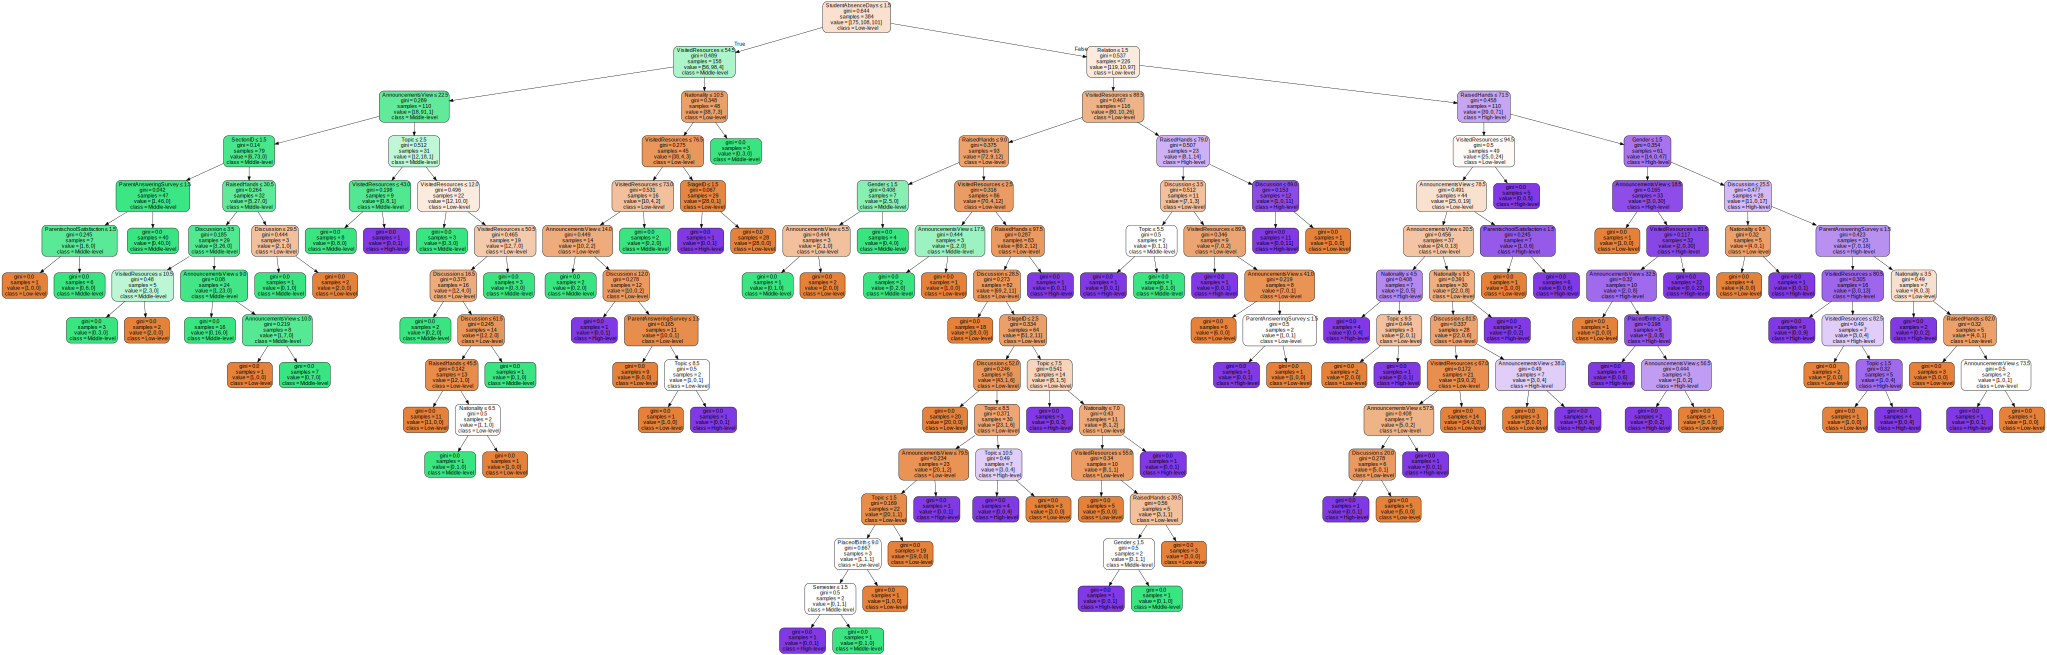

In [47]:
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=feature_columns,
class_names=['Low-level','Middle-level','High-level'],
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [48]:
# Work on modifying criterion to see the accuracy.
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [49]:
Accuracy_dt=metrics.accuracy_score(y_test,y_pred)
print("Accuracy : ",Accuracy_dt)


Accuracy :  0.7395833333333334


In [50]:
# The accuracy decreased by a certain margin. so entropy is not a good criterion. Now lets tune parameter of max_depth
clf=DecisionTreeClassifier(criterion="entropy",max_depth=13)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
Accuracy_dt=metrics.accuracy_score(y_test,y_pred)
print("Accuracy : ",Accuracy_dt)

Accuracy :  0.7395833333333334


In [51]:
#By combining entropy and max_depth accuracy increases to 0.73 which is very good for this model


In [52]:
# Now lets draw our modified decision tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("xAPI-Edu2")

'xAPI-Edu2.pdf'

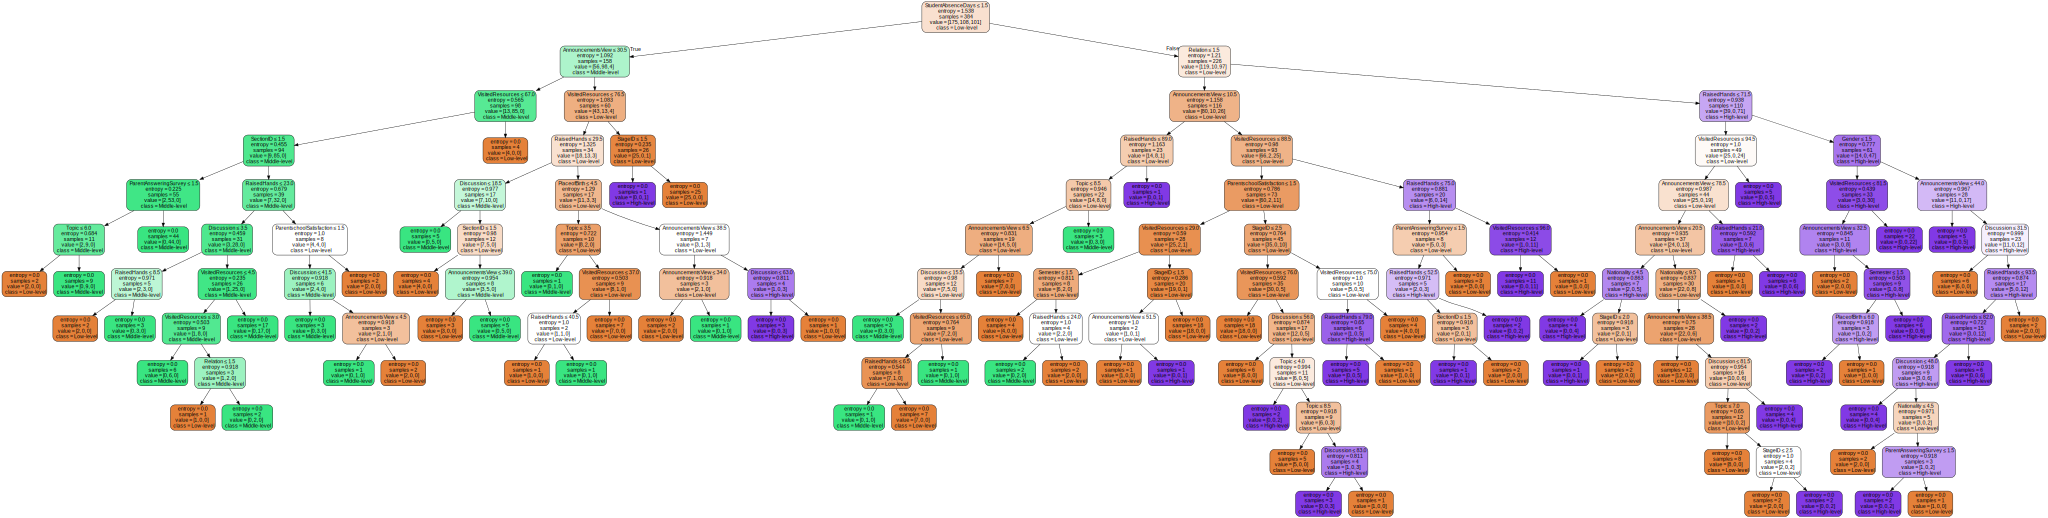

In [53]:
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=feature_columns,
class_names=['Low-level','Middle-level','High-level'],
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [54]:
# we draw the classifier for the decision tree labels and show the number of TP,TN,FP and FN. so We use Confusion metrix
#to calculate the TP,TN,FP,FN
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import classification_report
print("Confusion Metrix",metrics.confusion_matrix(y_test,y_pred))
cnf=metrics.confusion_matrix(y_test,y_pred)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))


Confusion Metrix [[23  7  6]
 [ 3 16  0]
 [ 9  0 32]]
Accuracy 0.7395833333333334


In [55]:
from sklearn.metrics import classification_report, accuracy_score

target_names = ['Low-level', 'Middle-level', 'High-level']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Low-level       0.66      0.64      0.65        36
Middle-level       0.70      0.84      0.76        19
  High-level       0.84      0.78      0.81        41

    accuracy                           0.74        96
   macro avg       0.73      0.75      0.74        96
weighted avg       0.74      0.74      0.74        96



# Naive Bayes Implementation

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
df_naive = df_dt.copy()

In [58]:
feature_columns=['Gender','Nationality','PlaceofBirth','StageID','SectionID','Topic','Semester','Relation','RaisedHands','VisitedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays']
X=df_naive[feature_columns]
y=df_naive.Class

In [59]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=109) # 70 % training and 30 % testing


In [60]:
gnb = GaussianNB()

In [61]:
gnb.fit(X_train, y_train)

GaussianNB()

In [62]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [64]:
# Lets try with some different split for data same as decision trees
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1) 

In [65]:
gnb.fit(X_train, y_train)

GaussianNB()

In [66]:
y_pred = gnb.predict(X_test)

In [67]:
Accuracy_naive=metrics.accuracy_score(y_test,y_pred)
print("Accuracy : ",Accuracy_naive)

Accuracy :  0.7708333333333334


In [68]:
# To conclude on the same split , naive bayes has a better accuracy.
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import classification_report
print("Confusion Metrix",metrics.confusion_matrix(y_test,y_pred))
cnf=metrics.confusion_matrix(y_test,y_pred)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))


Confusion Metrix [[23  6  7]
 [ 1 18  0]
 [ 7  1 33]]
Accuracy 0.7708333333333334


In [69]:
from sklearn.metrics import classification_report, accuracy_score

target_names = ['Low-level', 'Middle-level', 'High-level']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Low-level       0.74      0.64      0.69        36
Middle-level       0.72      0.95      0.82        19
  High-level       0.82      0.80      0.81        41

    accuracy                           0.77        96
   macro avg       0.76      0.80      0.77        96
weighted avg       0.77      0.77      0.77        96



In [70]:
#Lets use Randomn Forest Now

from sklearn.ensemble import RandomForestClassifier

In [71]:
df_rf = df_naive.copy()

In [72]:
feature_columns=['Gender','Nationality','PlaceofBirth','StageID','SectionID','Topic','Semester','Relation','RaisedHands','VisitedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays']
X=df_rf[feature_columns]
y=df_rf.Class

In [73]:
# Lets try with some different split for data same as decision trees and naive bayes
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1) 

In [74]:
clf=RandomForestClassifier()

In [75]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_pred=clf.predict(X_test)

In [77]:
Accuracy_rf = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy_rf)

Accuracy: 0.7916666666666666


In [78]:
#Can we improve this ?
clf=RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=300)

In [79]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
Accuracy_rf = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy_rf)

Accuracy: 0.7916666666666666


In [80]:
# Lets calculate feature importance using Randomn Forest Classifier
dn = {'features':feature_columns,'score':clf.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score',ascending=False)
      

AttributeError: 'AxesSubplot' object has no attribute 'get_xtickLabels'

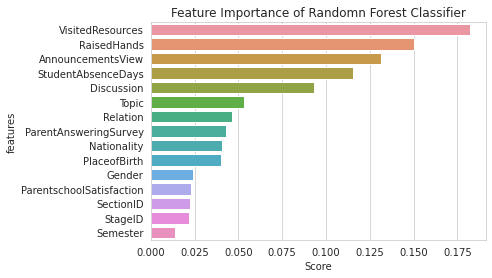

In [81]:
plot= sns.barplot(x='score',y='features',data=df,orient='h')
plot.set(xlabel="Score",yLabel="features",title='Feature Importance of Randomn Forest Classifier')
plt.setp(plot.get_xtickLabels(), rotation = 90)
plt.show()

In [ ]:
# So finally by the metric of accuracy our results are : 

print("Accuracy of decision Tree is : ", Accuracy_dt * 100,"%")
print("Accuracy of Naive Bayes is  : ", Accuracy_naive * 100, "%")
print("Accuracy of RandomnForest is : ", Accuracy_rf * 100 ,"%")